# Question 11 <a id='q11'></a>
For this problem, consider the dataset Prob_Assignment_Dataset.xlsx attached. As the vigilant
monitors of the Zappos.Com website, we are obsessed with who is coming to our website and what they
do during their visit. This challenge requires you to look at data similar to that which Analytics teams at
Zappos would use to assess the overall performance of the business.

## Import necessary visualization packages

In [1]:
library(ggplot2) # create different graphs
library(ggpubr) # show mutiple ggplots
library(repr) # set plot sizes

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggpubr' was built under R version 3.6.3"Loading required package: magrittr


## Read the dataset
Read the dataset and get a snapshot of the columns and data.

In [9]:
library("readxl")
df = read_excel('datasets//Prob_Assignment_Dataset (2).xlsx', sheet='Example_Data')
data_reference = read_excel('datasets//Prob_Assignment_Dataset (2).xlsx', sheet='Data_Reference', col_names = TRUE)
str(df)

New names:
* `` -> ...2


Classes 'tbl_df', 'tbl' and 'data.frame':	21061 obs. of  12 variables:
 $ day               : POSIXct, format: "2013-01-01" "2013-01-01" ...
 $ site              : chr  "Acme" "Acme" "Sortly" "Acme" ...
 $ new_customer      : num  1 1 1 1 1 1 1 1 0 0 ...
 $ platform          : chr  "Android" "BlackBerry" "iPad" "Windows" ...
 $ visits            : num  24 0 0 922 11 384 14 1 41 448 ...
 $ distinct_sessions : num  16 0 0 520 10 214 10 0 27 368 ...
 $ orders            : num  14 0 0 527 11 213 4 0 6 36 ...
 $ gross_sales       : num  1287 13 98 60753 1090 ...
 $ bounces           : num  4 0 0 149 0 65 4 0 6 80 ...
 $ add_to_cart       : num  16 0 0 610 11 245 7 0 12 79 ...
 $ product_page_views: num  104 1 0 3914 4 ...
 $ search_page_views : num  192 0 0 7367 19 ...


## View first 6 rows of dataframe

In [10]:
head(df)

day,site,new_customer,platform,visits,distinct_sessions,orders,gross_sales,bounces,add_to_cart,product_page_views,search_page_views
2013-01-01,Acme,1,Android,24,16,14,1287,4,16,104,192
2013-01-01,Acme,1,BlackBerry,0,0,0,13,0,0,1,0
2013-01-01,Sortly,1,iPad,0,0,0,98,0,0,0,0
2013-01-01,Acme,1,Windows,922,520,527,60753,149,610,3914,7367
2013-01-01,Botly,1,Android,11,10,11,1090,0,11,4,19
2013-01-01,Acme,1,Macintosh,384,214,213,28129,65,245,1783,3255


In [11]:
df$new_customer = factor(df$new_customer)
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	21061 obs. of  12 variables:
 $ day               : POSIXct, format: "2013-01-01" "2013-01-01" ...
 $ site              : chr  "Acme" "Acme" "Sortly" "Acme" ...
 $ new_customer      : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 1 1 ...
 $ platform          : chr  "Android" "BlackBerry" "iPad" "Windows" ...
 $ visits            : num  24 0 0 922 11 384 14 1 41 448 ...
 $ distinct_sessions : num  16 0 0 520 10 214 10 0 27 368 ...
 $ orders            : num  14 0 0 527 11 213 4 0 6 36 ...
 $ gross_sales       : num  1287 13 98 60753 1090 ...
 $ bounces           : num  4 0 0 149 0 65 4 0 6 80 ...
 $ add_to_cart       : num  16 0 0 610 11 245 7 0 12 79 ...
 $ product_page_views: num  104 1 0 3914 4 ...
 $ search_page_views : num  192 0 0 7367 19 ...


## Data reference

In [12]:
data_reference

Data column definitions,...2
day,The calendar day
site,Company site visited by users
new_customer,0 = returning customer; 1 = new customer; null = neither
platform,The type of device used by a website visitor
visits,The number of distinct website visits; 1 session may have multiple visits
distinct_sessions,The number of distinct website visitors; 1 session may have multiple visits
orders,The number of website orders
gross_sales,The total gross sales for website orders
bounces,The number of visits that only viewed one page
add_to_cart,The number of visits that added a product to cart


## Univariate data analysis
Below we will perform univariate dataset analysis for our dataset.

###  Distributions of categorical variables site and new_customer

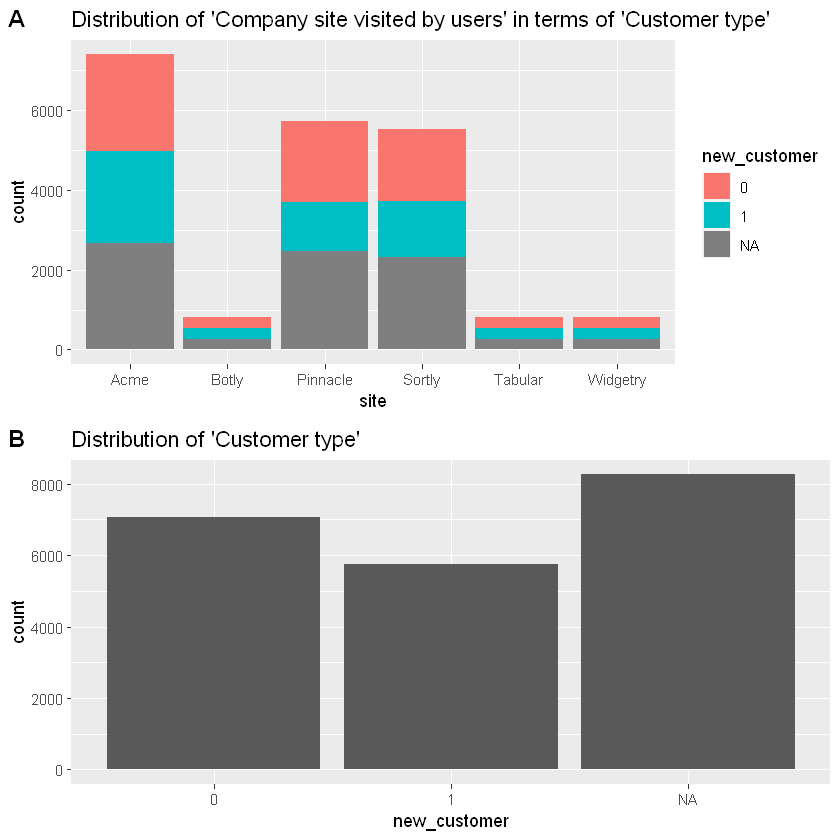

In [21]:
# options(repr.plot.width=7, repr.plot.height=7)
g1 = ggplot(data=df) + 
    aes(site,fill=new_customer) + 
    geom_bar() + 
    scale_x_discrete() + 
    labs(title="Distribution of 'Company site visited by users' in terms of 'Customer type'")

# options(repr.plot.width=4, repr.plot.height=7)
g2 = ggplot(data=df) + 
    aes(new_customer) + 
    geom_bar() + 
    scale_x_discrete() + 
    labs(title="Distribution of 'Customer type'")

figure <- ggarrange(g1, g2,
                    labels = c("A", "B"),
                    ncol = 1, nrow = 2)
figure

<b>Inference: </b>From the above histograms it is seen that there is a huge numbers of customers visiting Acme website. Also from graph B it is seen that we have almost uniform distribution of customer types.

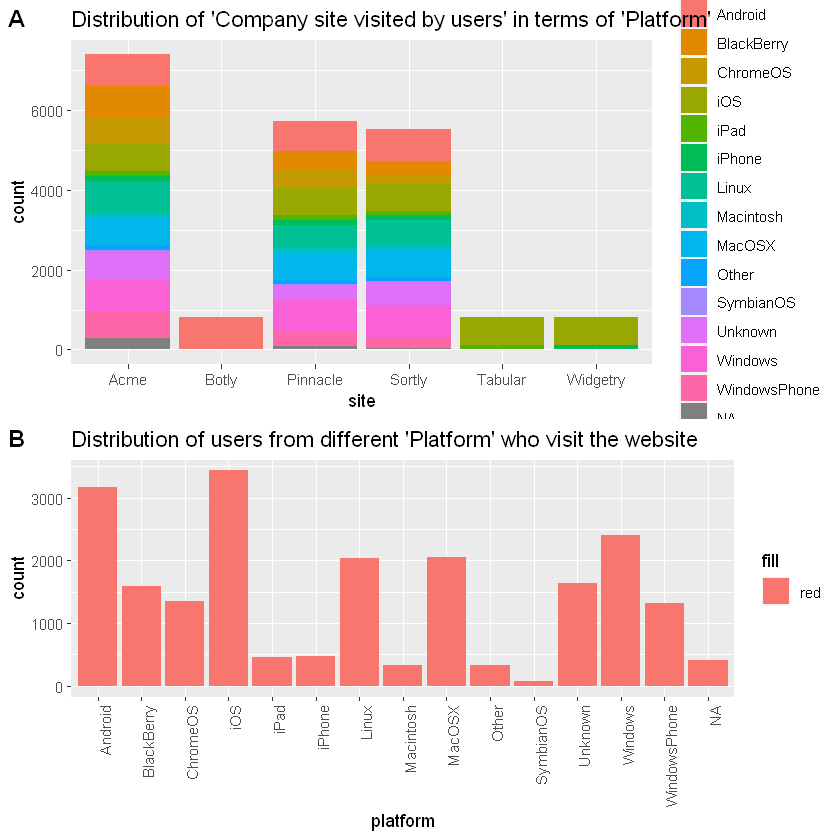

In [33]:
g1 = ggplot(data=df) + 
    aes(site,fill=platform) + 
    geom_bar() + 
    scale_x_discrete() + 
    labs(title="Distribution of 'Company site visited by users' in terms of 'Platform'")
g2 = ggplot(data=df) + 
    aes(platform,fill="red") + 
    geom_bar() + 
    scale_x_discrete() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    labs(title="Distribution of users from different 'Platform' who visit the website")
figure <- ggarrange(g1, g2,
                    labels = c("A", "B"),
                    ncol = 1, nrow = 2)
figure

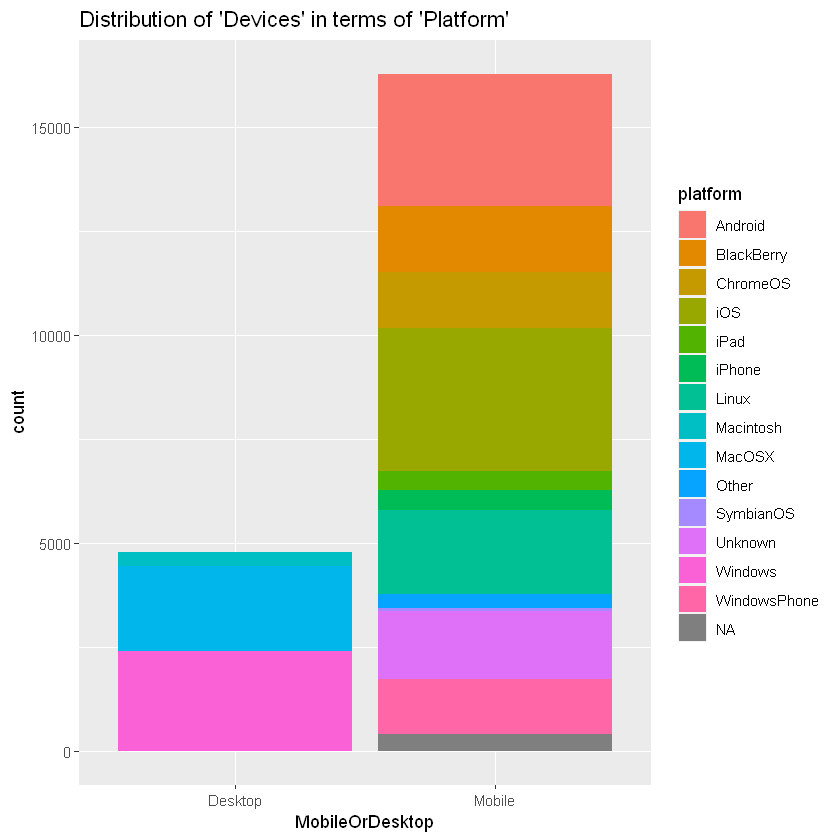

In [34]:
df$MobileOrDesktop = ifelse(df$platform %in% c("Macintosh","MacOSX","Windows"), "Desktop", "Mobile")
g1 = ggplot(data=df) + 
    aes(MobileOrDesktop,fill=platform) + 
    geom_bar() + 
    scale_x_discrete() + 
    labs(title="Distribution of 'Devices' in terms of 'Platform'")
g1

<b>Inference: </b>Most customers visited were through iOS platform followed by Android. This is very much expected as in real world most people belong to either Android or an iOS customers. Also it is seen that the number of people visiting this website through Windows or Linux or MaxOSX (Assuming them to be desktop computers) are significantly lower than mobile users. This gives us a notion that people are mostly logging into the website more through their cellphones than through desktop.